In [1]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,})

In [16]:
def get_runs(project, take_mean=False, use_desc=False):
    """Gets runs from WandB returns the DF of the runs and the unique experiment types"""
    api = wandb.Api()
    entity = "sashalikesplanes"
    runs = api.runs(entity + '/' + project)

    best_accuracy, exp_type = [], []
    for run in runs:
        try:
            if take_mean:
                best_accuracy.append(run.history()['accuracy'].mean())
            else:
                best_accuracy.append(run.history()['accuracy'].max())
            
            if use_desc:
                exp_type.append(run.sweep.id)
            else:
                exp_type.append(run.sweep.name)
        except KeyError:
            print("run has no accuracy")

    runs_df = pd.DataFrame({
    "exp_type": exp_type,
    "accuracy": best_accuracy,})

    return runs_df, runs_df.exp_type.unique()

In [3]:
def plot_hist(exp_names, label_names, runs_df, width=15, height=5):
    accuracies_per_exp = [runs_df[runs_df.exp_type == exp].accuracy.to_numpy() for exp in exp_names]
    plt.boxplot(accuracies_per_exp, labels=label_names)
    plt.xticks(rotation=45, ha='right')
    plt.grid()
    fig = plt.gcf()
    fig.set_size_inches(width,height)
    plt.ylabel("Accuracy (-)")
    values = list(map(lambda name, accuracy: f"{name}: {accuracy.mean() * 100:.2f} %", label_names, accuracies_per_exp))
    print('\n'.join(values))
    fig.set_dpi(200)

In [4]:
di_accuracies, di_accuracies_names = get_runs("ModelReplicate")

run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy


In [5]:
di_accuracies_names

array(['DI, e, u, x, dedt, dudt, dxdt', 'DI, u only', 'DI, x only',
       'DI, u and x', 'DI, e ,x', 'DI, e and u', 'DI, e only',
       'SI, x only', 'SI, u and x', 'SI, e ,x', 'SI, e and u',
       'SI, e only', 'SI, u only', 'SI, all vars, random labels',
       'DI, e, u, x, dxdt', 'DI, e, u, x, dudt', 'DI, e, u, x, dedt',
       'SI, e, u, x, dxdt', 'SI, e, u, x, dudt',
       'SI, e, u, x, dedt, dudt, dxdt', 'SI, e, u, x, dedt',
       'DI, e, u, x', 'SI, e, u, x', 'Best Model, no de, dx, du, and x',
       'Incorrect labels', 'Best Model on SI', 'Replicate Model 25 x 25'],
      dtype=object)

In [6]:
si_accuracies, si_accuracies_names = get_runs("AccuraciesFix")

run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy


In [7]:
si_accuracies_names

array(['e, u, x, dxdt', 'e, u, x, dedt', 'e, u, x, dudt', 'u, x', 'e, x',
       'e, u, x', 'e, u', 'e, u, x, de, du, dx V2',
       'e, u, x, de, du, dx - DI'], dtype=object)

In [8]:
di_si_accuracies = si_accuracies.append(di_accuracies)

/tmp/ipykernel_5811/1624354083.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  di_si_accuracies = si_accuracies.append(di_accuracies)


In [24]:
di_si_accuracies_desired = ['DI, e, u, x',
                            'DI, e, u, x, dedt',
                            'DI, e, u, x, dudt',
                            'DI, e, u, x, dxdt',
                            'DI, e, u, x, dedt, dudt, dxdt',
                            'e, u, x',
                            'e, u, x, dedt',
                            'e, u, x, dudt',
                            'e, u, x, dxdt',
                            'e, u, x, de, du, dx V2'
                           ]
di_si_accuracies_names = ['DI - e, u, x',
                          r'$DI - e, \dot e, u, x$',
                          r'$DI - e, u, \dot u, x$',
                          r'$DI - e, u, x, \dot x$',
                          r'$DI - e, \dot e , u, \dot u , x, \dot x $',
                          'SI - e, u, x',
                          r'$SI - e, \dot e, u, x$',
                          r'$SI - e, u, \dot u, x$',
                          r'$SI - e, u, x, \dot x$',
                          r'$SI - e, \dot e , u, \dot u , x, \dot x $',]

DI - e, u, x: 88.02 %
$DI - e, \dot e, u, x$: 93.06 %
$DI - e, u, \dot u, x$: 88.42 %
$DI - e, u, x, \dot x$: 93.41 %
$DI - e, \dot e , u, \dot u , x, \dot x $: 94.94 %
SI - e, u, x: 85.76 %
$SI - e, \dot e, u, x$: 86.63 %
$SI - e, u, \dot u, x$: 87.98 %
$SI - e, u, x, \dot x$: 87.80 %
$SI - e, \dot e , u, \dot u , x, \dot x $: 91.26 %


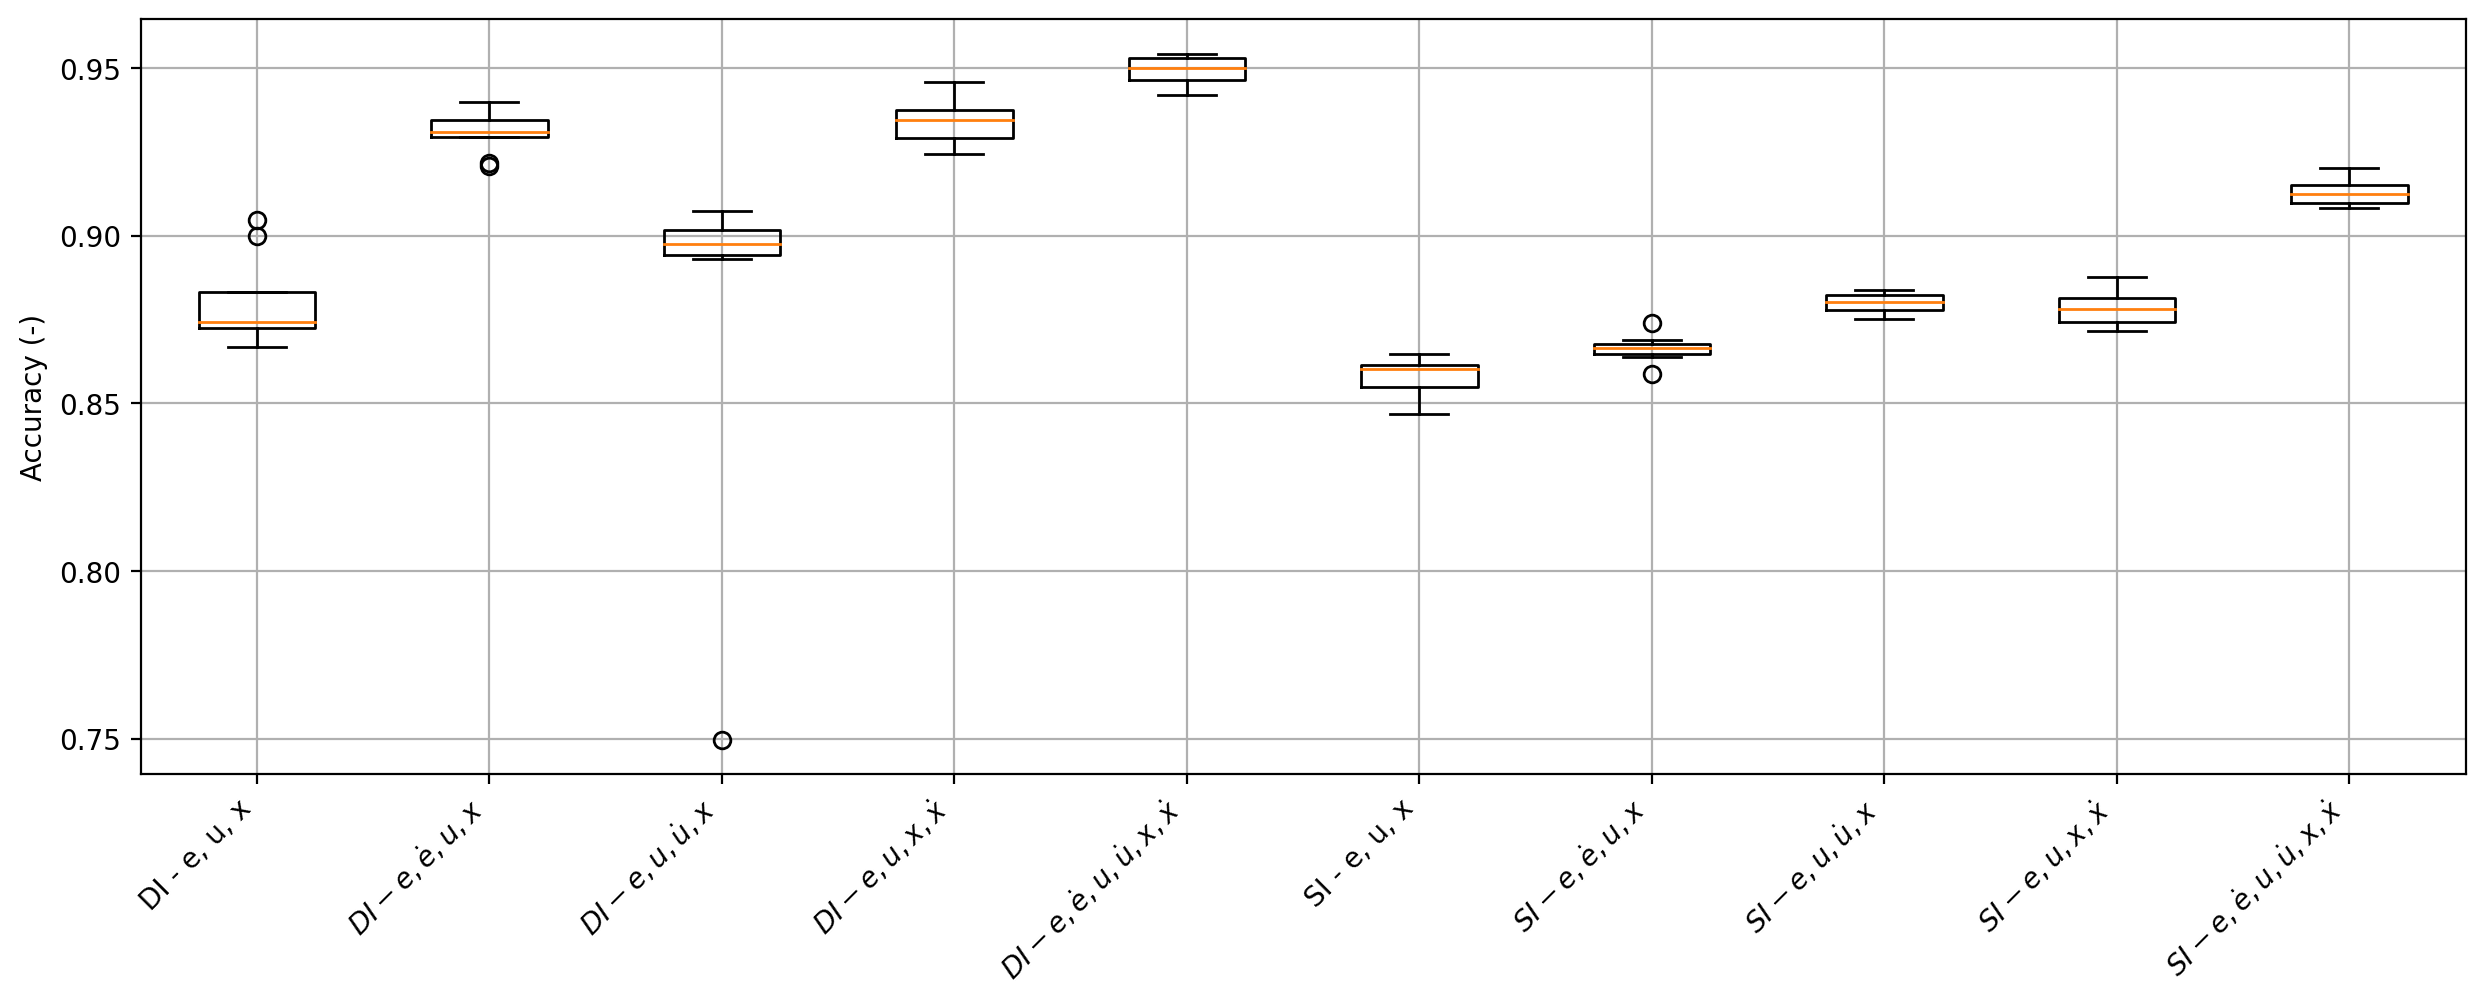

In [58]:
plot_hist(di_si_accuracies_desired, di_si_accuracies_names, di_si_accuracies)

In [18]:
di_cross_valid_runs, di_cross_valid_names = get_runs("CrossValid")

run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy


In [19]:
di_cross_valid_names

array(['DI - subject 7', 'DI - subject 6', 'DI - subject 5',
       'SI - subject 9', 'SI - subject 8', 'DI - subject 4',
       'SI - subject 7', 'DI - subject 3', 'SI - subject 6',
       'DI - subject 2', 'SI - subject 5', 'DI - subject 1',
       'SI - subject 4', 'SI - subject 3', 'SI - subject 2',
       'SI - subject 1', 'DI - subject 9', 'DI - subject 8'], dtype=object)

In [20]:
si_cross_valid_runs, si_cross_valid_names = get_runs("CrossValidFix")

In [21]:
cross_valid_runs = di_cross_valid_runs.append(si_cross_valid_runs)

/tmp/ipykernel_5811/2232335139.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_valid_runs = di_cross_valid_runs.append(si_cross_valid_runs)


In [22]:
cross_valid_desired = ['DI - subject 1', 'DI - subject 2', 'DI - subject 3', 'DI - subject 4','DI - subject 5', 'DI - subject 6',
       'DI - subject 7', 'DI - subject 8','DI - subject 9', 'Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5',
       'Subject 6', 'Subject 7', 'Subject 8', 'Subject 9', ]
cross_valid_names = ['DI - Subject 1', 'DI - Subject 2', 'DI - Subject 3', 'DI - Subject 4','DI - Subject 5', 'DI - Subject 6',
       'DI - Subject 7', 'DI - Subject 8','DI - Subject 9', 'SI - Subject 1', 'SI - Subject 2', 'SI - Subject 3', 'SI - Subject 4', 'SI - Subject 5',
       'SI - Subject 6', 'SI - Subject 7', 'SI - Subject 8', 'SI - Subject 9', ]

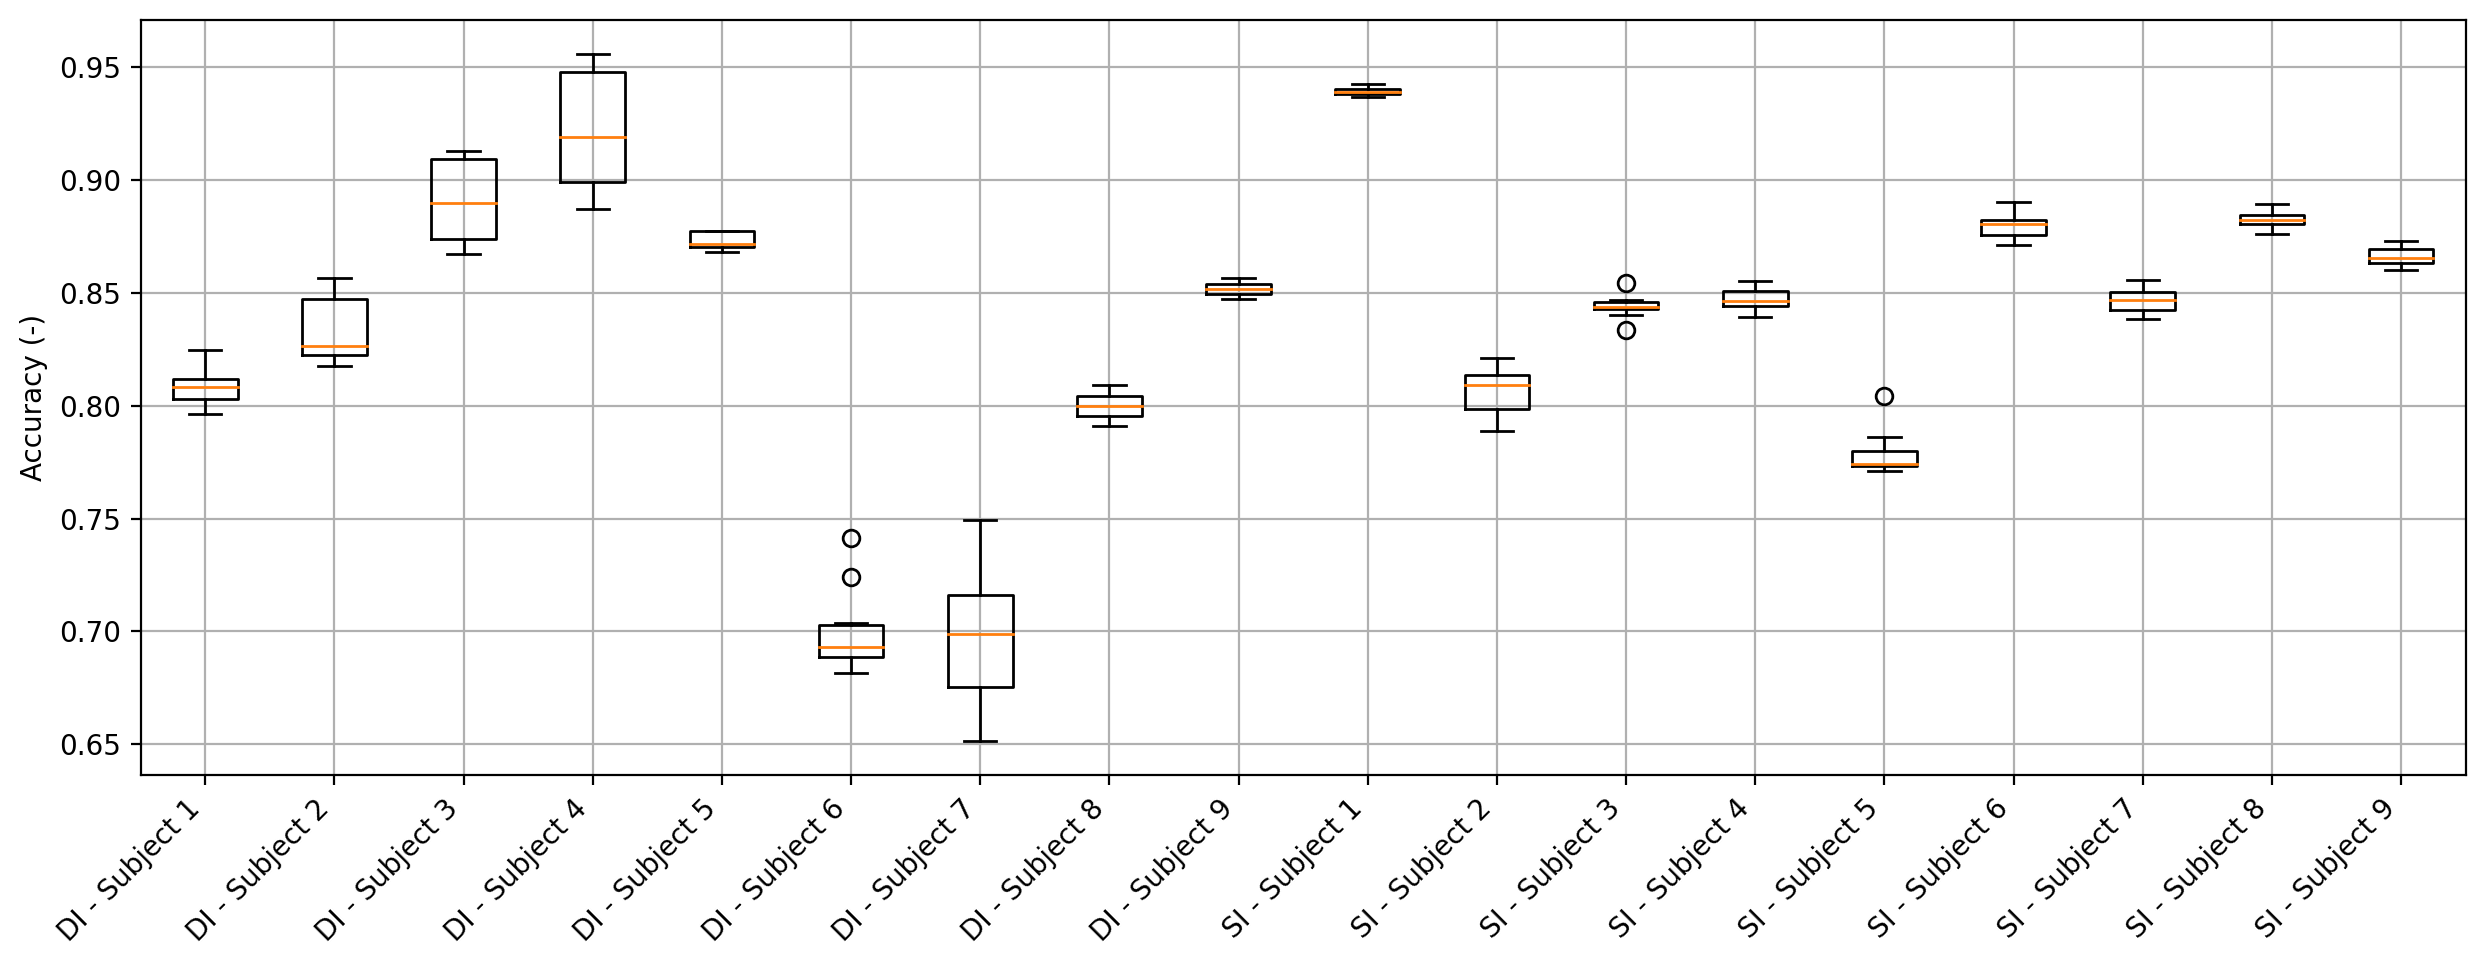

In [23]:
plot_hist(cross_valid_desired, cross_valid_names, cross_valid_runs)

In [17]:
random_runs_mean, random_names = get_runs("RandomFix", take_mean=True, use_desc=True)
random_runs, random_names = get_runs("RandomFix", take_mean=False, use_desc=True)

In [18]:
random_names

array(['sg8iagox', 'g3bgl2jp'], dtype=object)

In [19]:
random_names_label = ['SI', 'DI']

SI: 34.05 %
DI: 34.08 %


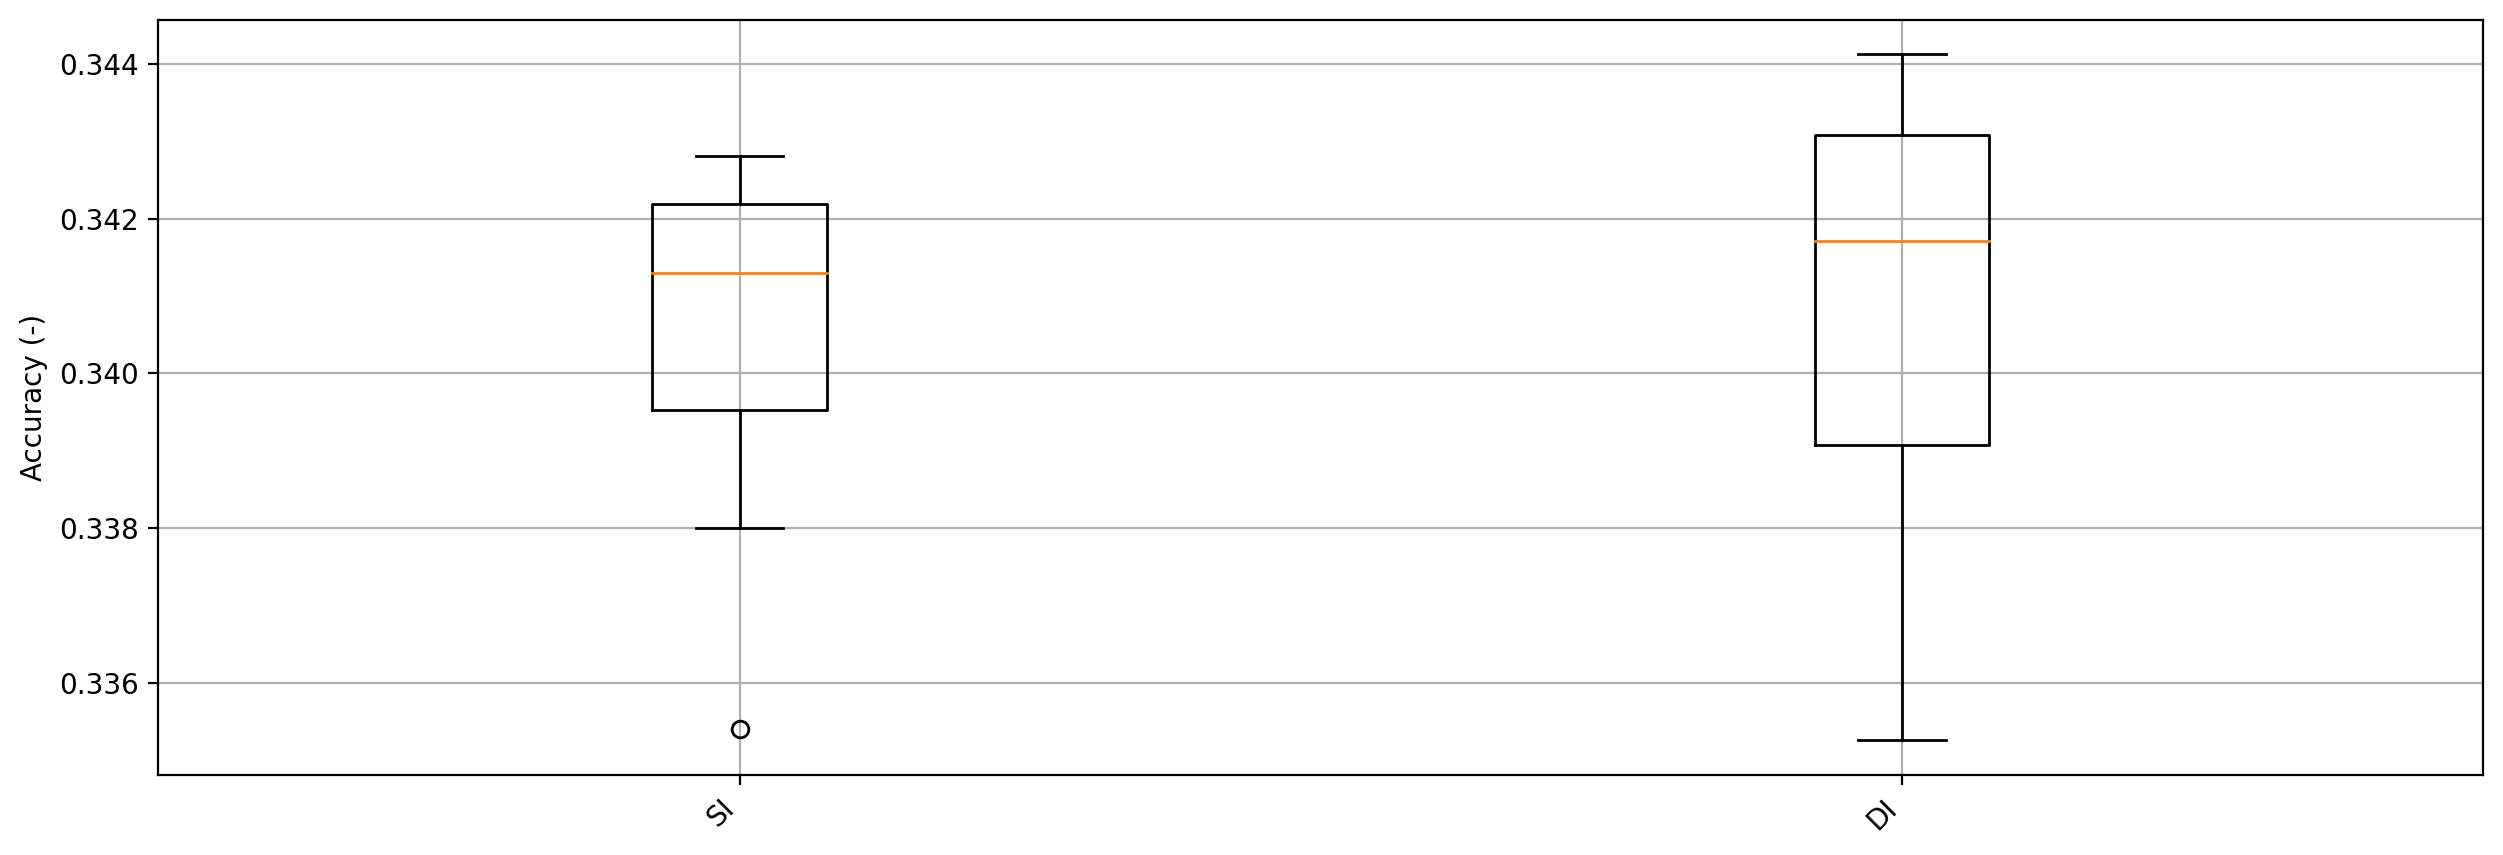

In [26]:
plot_hist(random_names, random_names_label, random_runs, width=15, height=5)

SI: 33.33 %
DI: 33.41 %


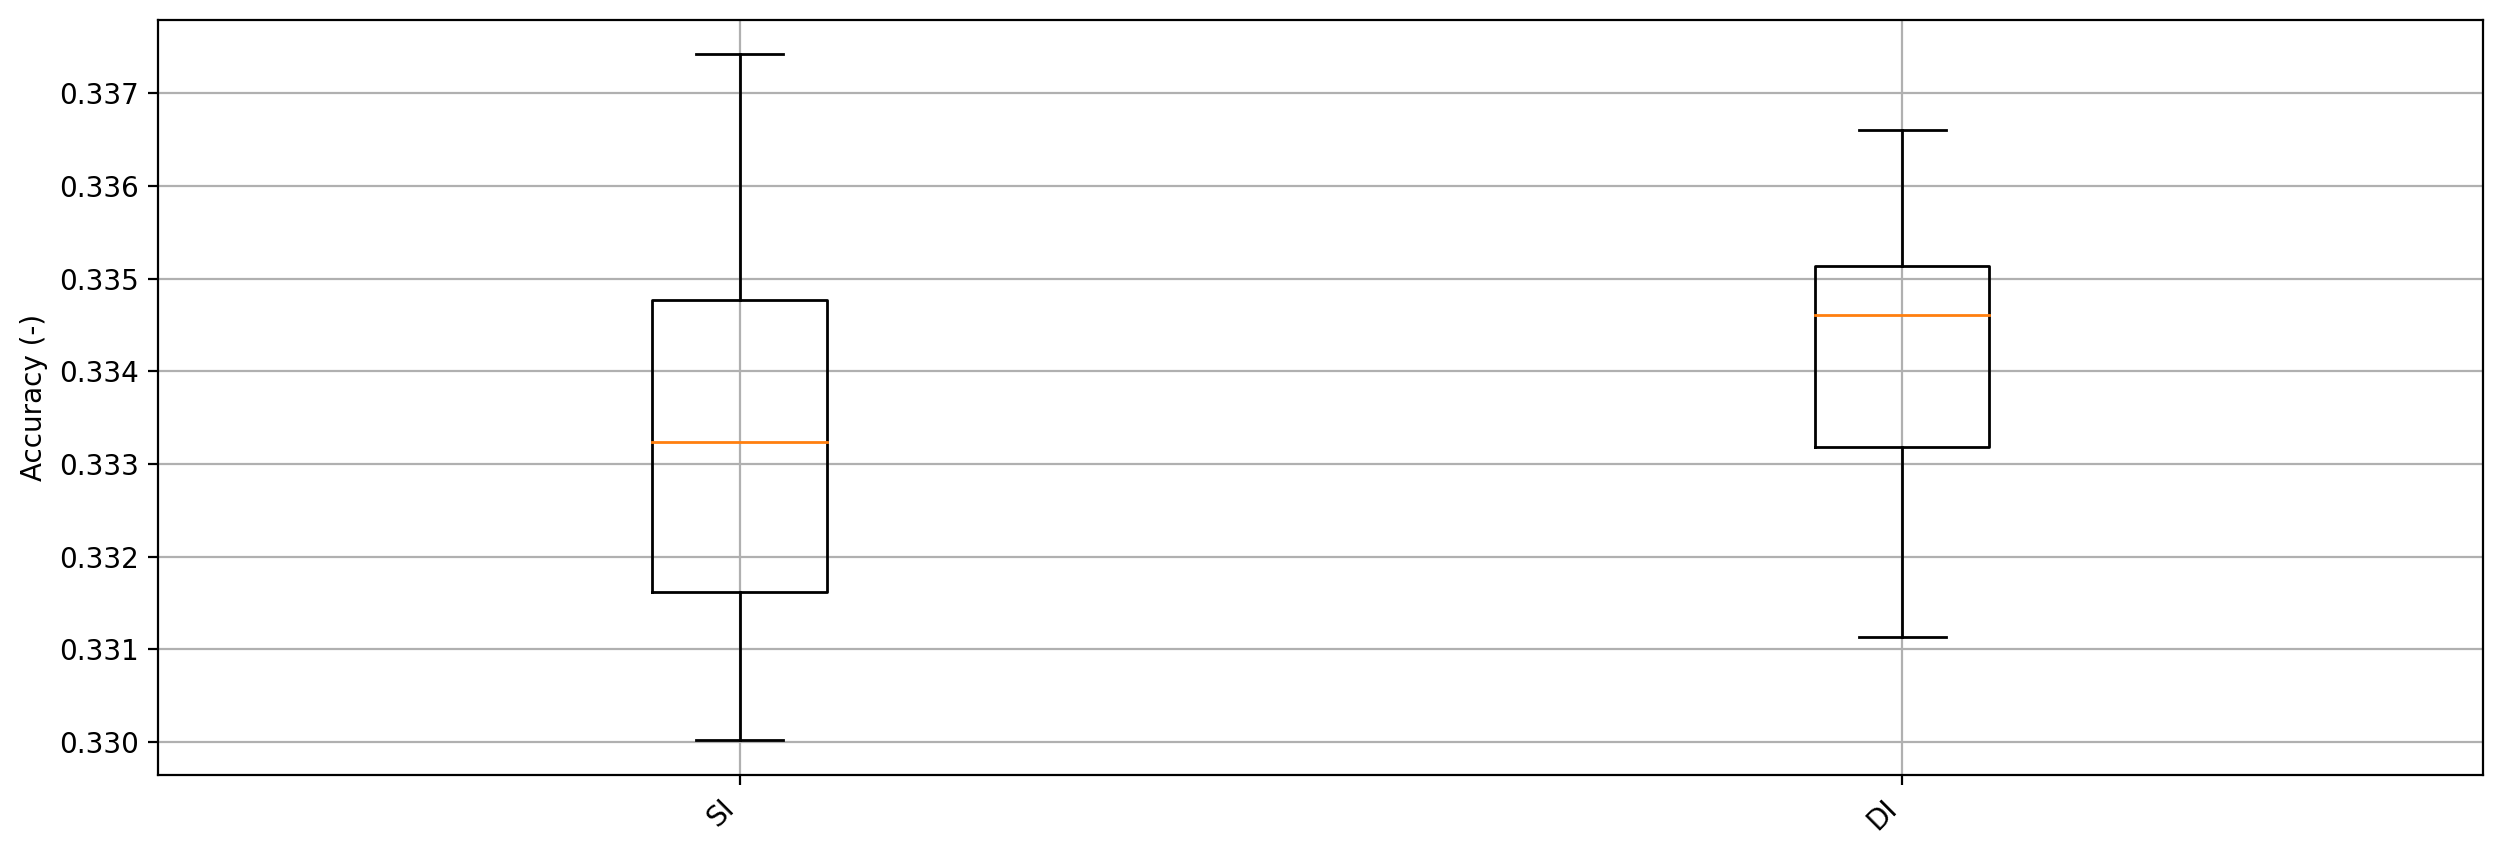

In [22]:
plot_hist(random_names, random_names_label, random_runs_mean)

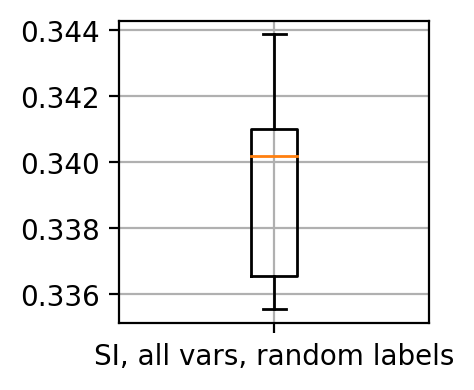

In [42]:
exp_names_SI_random = ['SI, all vars, random labels',]
plot_hist(exp_names_SI_random, ['Random Labels'], width=2, height=2)

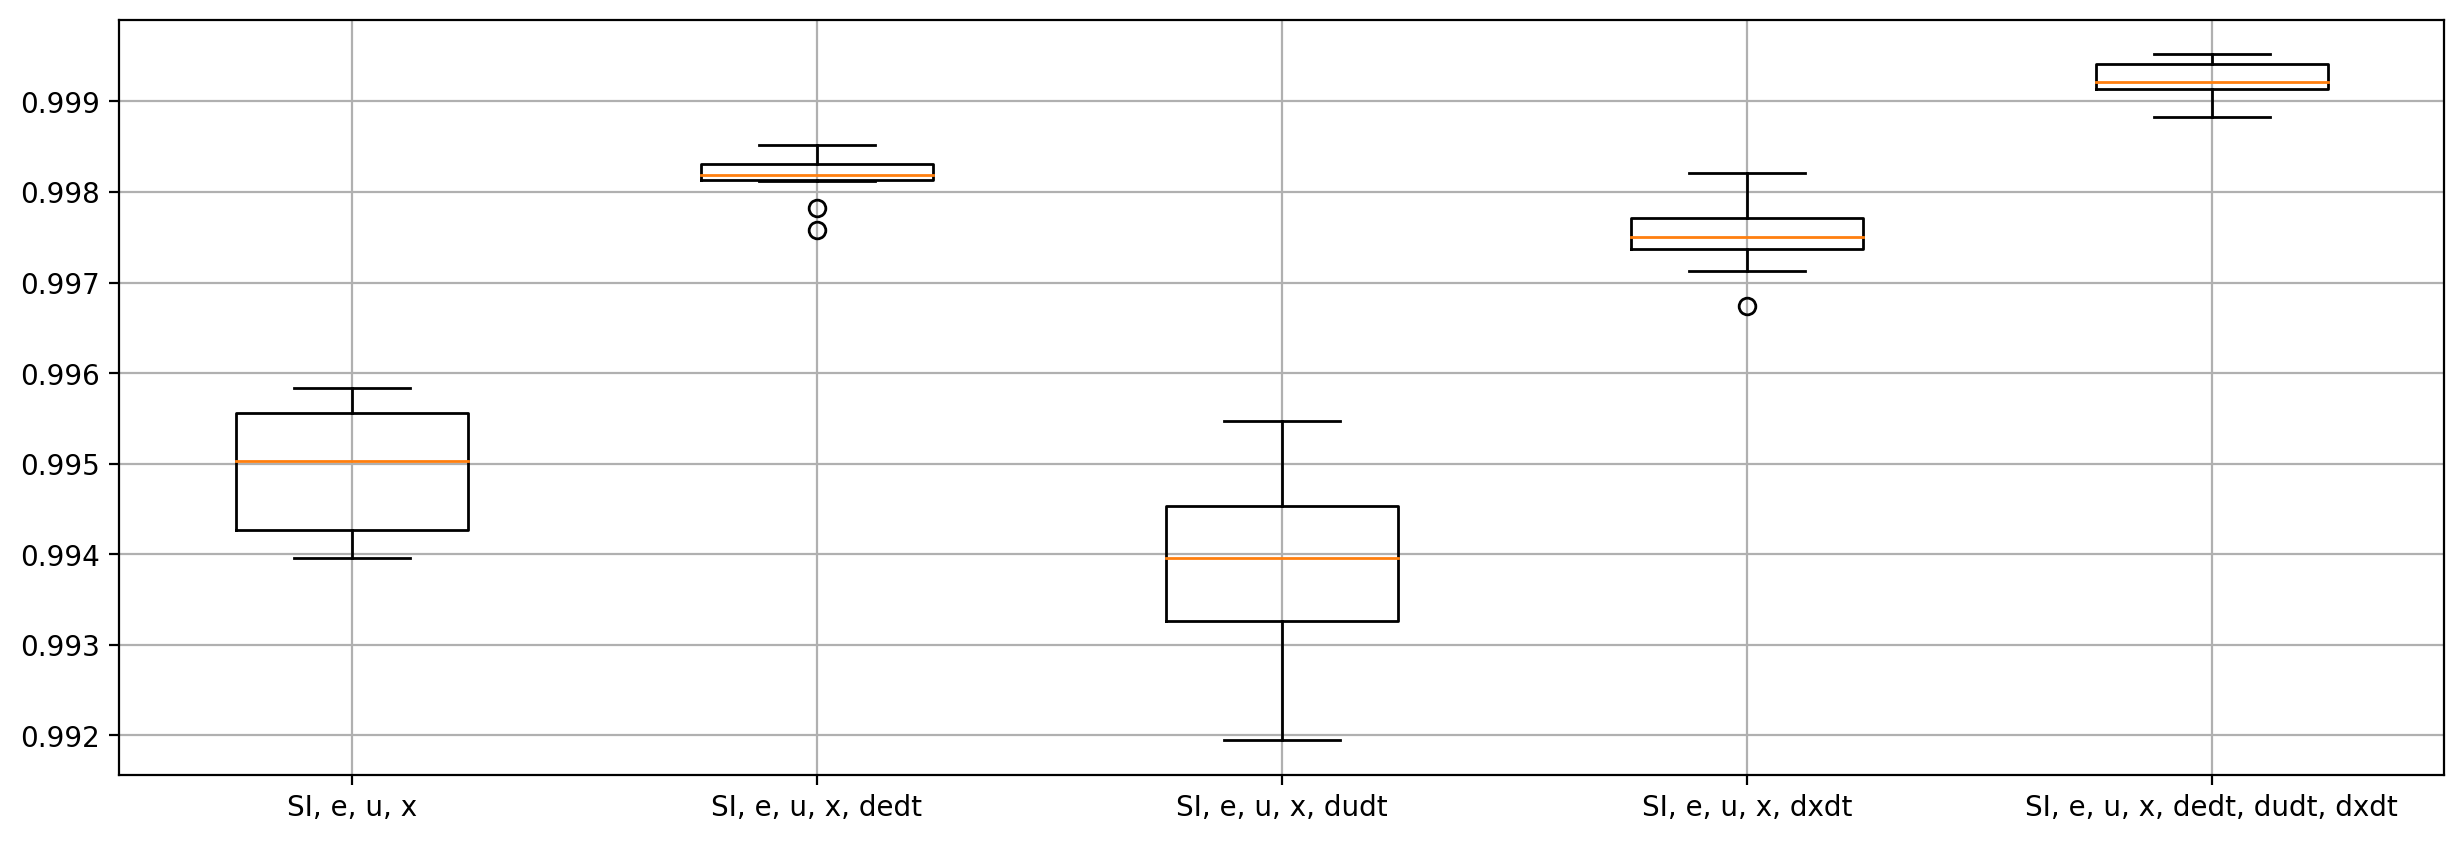

In [43]:
si_derivs = [
 
 ]
plot_hist(si_derivs)

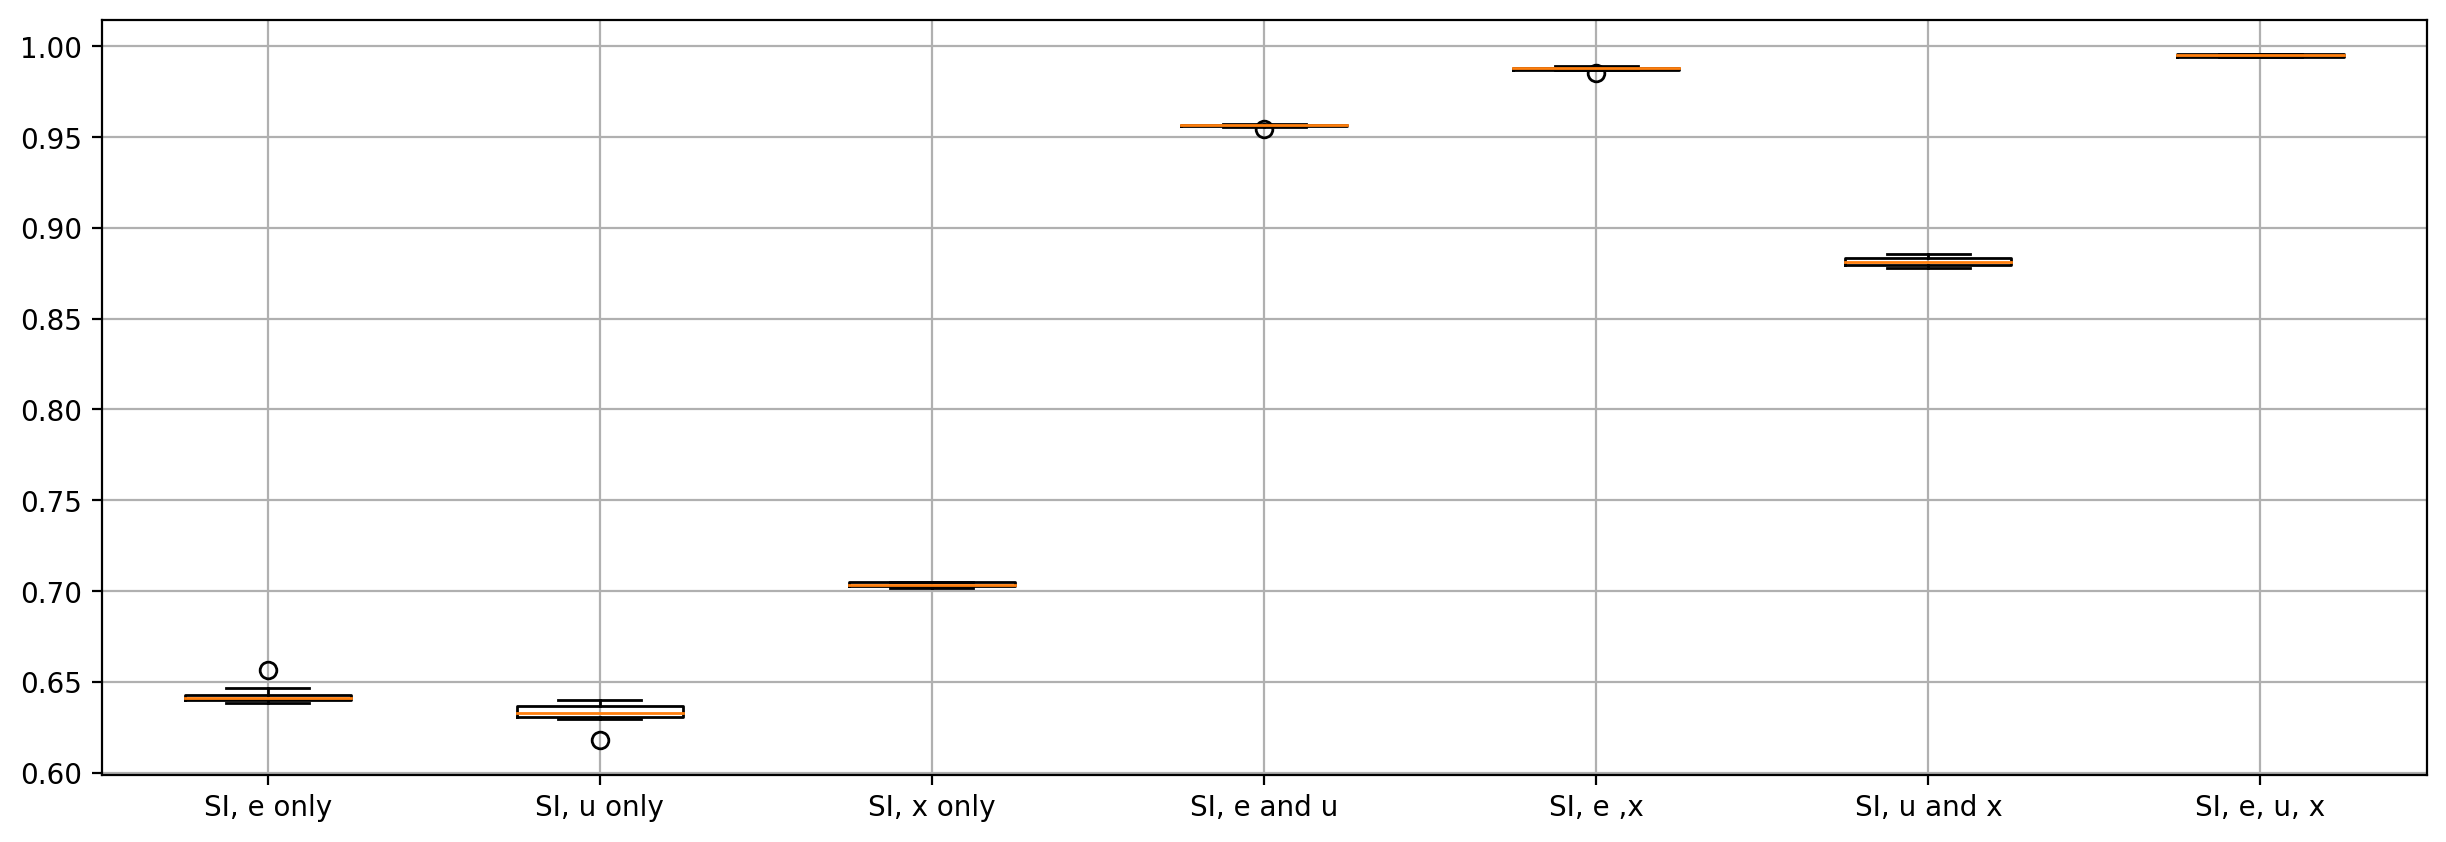

In [58]:
si_sigs = [
     
]
plot_hist(si_sigs)

In [57]:
comp_purs_runs, comp_purs_names = get_runs("CompVsPurs")

In [52]:
comp_purs_names

['Best Model on SI',
 'Best Model, no de, dx, du, and x',
 'DI, e ,x',
 'DI, e and u',
 'DI, e only',
 'DI, e, u, x',
 'DI, e, u, x, dedt',
 'DI, e, u, x, dedt, dudt, dxdt',
 'DI, e, u, x, dudt',
 'DI, e, u, x, dxdt',
 'DI, u and x',
 'DI, u only',
 'DI, x only',
 'Incorrect labels',
 'Replicate Model 25 x 25',
 'SI, all vars, random labels',
 'SI, e ,x',
 'SI, e and u',
 'SI, e only',
 'SI, e, u, x',
 'SI, e, u, x, dedt',
 'SI, e, u, x, dedt, dudt, dxdt',
 'SI, e, u, x, dudt',
 'SI, e, u, x, dxdt',
 'SI, u and x',
 'SI, u only',
 'SI, x only']